## INSTRUCTIONS - IMPORTANT:

Every student is expected to submit their own, original solutions for this assignment. While collaborative discussions among classmates are encouraged for better understanding, it is crucial that the work you submit is your own. Copying or replicating someone else's solutions is a breach of academic integrity and will not be tolerated. The use of **AI tools** is also **prohibited** for this assignment.

The dataset used in this assignment is derived from Inside Airbnb, available [here](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-06-05/visualisations/listings.csv). It is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

**Please note that this dataset has been modified and adapted for the scope of this academic assignment. If you are interested in the original data or further Airbnb datasets, we encourage you to visit Inside Airbnb's website: [insideairbnb.com](http://insideairbnb.com).**


<h3> This assignment is divided into two main components: </h3>

1. **Data Manipulation**: Focused on cleaning and preparing the dataset.
2. **Exploratory Data Analysis (EDA)**: Concentrated on analyzing and interpreting the data.

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [870]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [871]:
df = pd.read_csv("D:\\Perspectives on Data Science (CS-746-15280-Fall 2024)\\LargeHW\\airbnb_final.csv")

In [872]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   host_id           7602 non-null   float64
 1   neighbourhood     7608 non-null   object 
 2   latitude          7604 non-null   float64
 3   longitude         7602 non-null   float64
 4   room_type         7608 non-null   object 
 5   price in $        7598 non-null   float64
 6   minimum_nights    7599 non-null   float64
 7   availability_365  7607 non-null   float64
 8   Apartment_type    7607 non-null   object 
 9   City              7607 non-null   object 
 10  Rating            6030 non-null   float64
 11  No_of_bed_rooms   7324 non-null   float64
 12  No_of_beds        7591 non-null   float64
 13  No_of_bathrooms   6804 non-null   float64
 14  Bathroom_type     7607 non-null   object 
dtypes: float64(10), object(5)
memory usage: 891.7+ KB


In [873]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [875]:
#Code goes here
df.shape

(7608, 15)

### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [877]:
# 1.2.1 Code to identify data types goes here.
''' 
Created a checkDType function to get data type information
1. looping through the columns of the data frame. 
2. Inserting to the dictionary as a key(column) value (datatype) pair.
'''
columnDict = {}       # defining empty dictionary
def checkDType(df):
    # check for every columns
    dfColumn = df.columns
    columnSet = set(dfColumn)       # convert list to set to navigate through elements
    for col in columnSet:
        columnDict[col] = df[col].dtype
    print(f" Data Types of Columns : \n {columnDict}")
    
checkDType(df)

 Data Types of Columns : 
 {'Rating': dtype('float64'), 'Apartment_type': dtype('O'), 'price in $': dtype('float64'), 'longitude': dtype('float64'), 'No_of_beds': dtype('float64'), 'latitude': dtype('float64'), 'Bathroom_type': dtype('O'), 'neighbourhood': dtype('O'), 'host_id': dtype('float64'), 'room_type': dtype('O'), 'minimum_nights': dtype('float64'), 'City': dtype('O'), 'No_of_bed_rooms': dtype('float64'), 'availability_365': dtype('float64'), 'No_of_bathrooms': dtype('float64')}


In [878]:
# # 1.2.3 change the host_id column to an integer 
'''
Change datatype of all the column that require type change. Columns contains float64 data type which is a numeric but due to the data value 
integer data types also suitable for the column in orger to reduce the memory allocation by higher order datatypes.

1. All the columns are stored in a set
2. Iterated over every element
3. Fill with 0 to handle any type conversion issue due to missing value.

'''
listOfColumnstoChangeDataType = {'host_id', 'minimum_nights', 'availability_365', 'No_of_beds', 'No_of_bed_rooms', 'No_of_bathrooms'}

for ele in listOfColumnstoChangeDataType:
    df[ele] = df[ele].fillna(0).astype(int)


In [879]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   host_id           7608 non-null   int32  
 1   neighbourhood     7608 non-null   object 
 2   latitude          7604 non-null   float64
 3   longitude         7602 non-null   float64
 4   room_type         7608 non-null   object 
 5   price in $        7598 non-null   float64
 6   minimum_nights    7608 non-null   int32  
 7   availability_365  7608 non-null   int32  
 8   Apartment_type    7607 non-null   object 
 9   City              7607 non-null   object 
 10  Rating            6030 non-null   float64
 11  No_of_bed_rooms   7608 non-null   int32  
 12  No_of_beds        7608 non-null   int32  
 13  No_of_bathrooms   7608 non-null   int32  
 14  Bathroom_type     7607 non-null   object 
dtypes: float64(4), int32(6), object(5)
memory usage: 713.4+ KB


### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [881]:
'''
Data frame contains information about the property details and pricing. Host Id refers to the property owner and owner can have more than one property. 
So identyfy the duplicates can be done using Latitude and Longiture. Assuming same latitude and Longitude value refers to duplicate property.
1. Perform duplicate check by grouping by latitude and longitude.
2. Filter the groups where the count (Freq) is greater than 1
'''
result = df.groupby(['latitude', 'longitude']).size().reset_index(name='Freq')
result_duplicates = result[result['Freq'] > 1]

'''
If duplicates properties found droping is the prefered option
'''

'\nIf duplicates properties found droping is the prefered option\n'

In [882]:
# 1.3.1 check for duplicate values
'''
1. Duplicate check on the basis of "latitude" & "longitude" since same property may listed twice
'''
def checkDuplicate(df):
    DuplicateSeries = df[['latitude', 'longitude']].duplicated()
    duplicateCount = 0
    for value in DuplicateSeries:    
        if str(value)=='True':
            duplicateCount +=1

    return duplicateCount, DuplicateSeries
duplicateCount, boolenSeries = checkDuplicate(df)
duplicateCount, boolenSeries

(131,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 7603    False
 7604    False
 7605    False
 7606    False
 7607    False
 Length: 7608, dtype: bool)

In [883]:
# Added !!! drop duplicate values
df_02 = df.drop_duplicates(subset=['latitude', 'longitude'], keep='first')

### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [885]:
# 1.4.1 check for missing values
'''
1. Using isnull and sum function 
'''
df_02.isnull().sum()

host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         0
availability_365       0
Apartment_type         1
City                   1
Rating              1546
No_of_bed_rooms        0
No_of_beds             0
No_of_bathrooms        0
Bathroom_type          1
dtype: int64

In [886]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
meanFill = df['price in $'].mean()
df_02['price in $'] = df_02['price in $'].fillna(meanFill.round(1))

C:\Users\aarun\AppData\Local\Temp\ipykernel_43452\1946269302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_02['price in $'] = df_02['price in $'].fillna(meanFill.round(1))


In [887]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
df_02['price in $'].isna().sum()

0

In [888]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df_02['City'] = df_02['City'].fillna('Amsterdam')

C:\Users\aarun\AppData\Local\Temp\ipykernel_43452\1354899625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_02['City'] = df_02['City'].fillna('Amsterdam')


In [889]:
# 1.4.6 Verify that there are no more missing values in the 'City' column
df_02['City'].isna().sum()

0

In [890]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2 = df_02.dropna()

In [891]:
# Added !!! 
'''
Droping the rows where host_id is 0, During Data type change it was filled with 0 value using fillna(0) to fill the missing values
1. Drop rows where 'host_id' is 0
'''
df2.drop(df2[df2['host_id'] == 0].index, inplace=True)

C:\Users\aarun\AppData\Local\Temp\ipykernel_43452\3659075350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2[df2['host_id'] == 0].index, inplace=True)


In [892]:
df2.shape

(5915, 15)

In [893]:
df2['price in $'].min()

0.0

### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [895]:
# 1.5.1 code to show shapes of old and new dataframes
'''
1. Function is created to get shapes of original and new data frame.
'''
def showShape(df_before, df_after):
    shape_before = df_before.shape
    shape_after = df_after.shape

    return shape_before, shape_after
shape_before, shape_after = showShape(df, df2)
print(f" Shape before: {shape_before} \n Shape After : {shape_after}")

 Shape before: (7608, 15) 
 Shape After : (5915, 15)


In [896]:
# 1.5.2 Code to verify no missing values
df2.isnull().sum()

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

Note: from here forward, work with the df2 DataFrame.

In [899]:
# 1.6.1 Code goes here
df2.drop(columns=['latitude', 'longitude'], inplace=True)

C:\Users\aarun\AppData\Local\Temp\ipykernel_43452\312826490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['latitude', 'longitude'], inplace=True)


In [900]:
# 1.6.2 Show new shape
df2.shape

(5915, 13)

### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [902]:
# 1.7.1 Find and list the unique apartment tpyes.
df2['Apartment_type'].value_counts()

Apartment_type
Rental unit           2644
Condo                 1171
Home                   499
Bed and breakfast      284
Townhouse              267
Houseboat              215
Loft                   195
Boat                   132
Guest suite            106
Serviced apartment      82
Hotel                   79
Boutique hotel          58
Hostel                  38
Guesthouse              32
Villa                   21
Place to stay           18
Aparthotel              15
casa particular         13
Vacation home           12
Tiny home                9
Cabin                    6
Earthen home             4
Farm stay                3
Cottage                  2
Nature lodge             2
Camper/RV                2
Chalet                   2
Tower                    1
Barn                     1
Bungalow                 1
Tent                     1
Name: count, dtype: int64

In [903]:
# 1.7.2 Find and list the unique bathroom types.
df2['Bathroom_type'].value_counts()  

Bathroom_type
private    5438
shared      477
Name: count, dtype: int64

### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [905]:
# 1.8.1 Replace the strings with integers
df2['Bathroom_type'] = df2['Bathroom_type'].map({'private': 1, 'shared': 0})

C:\Users\aarun\AppData\Local\Temp\ipykernel_43452\329139970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bathroom_type'] = df2['Bathroom_type'].map({'private': 1, 'shared': 0})


In [906]:
# 1.8.2 Verify the changes
df2['Bathroom_type'].head(5)

0    0
1    1
2    1
3    1
4    1
Name: Bathroom_type, dtype: int64

# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

### 2.1. **Describe the data.**

In [910]:
# Describe data here.
df2.describe()

,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
count,5.915000e+03,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000,5915.000000
mean,9.443714e+07,239.408774,4.968216,74.213356,4.822877,1.500423,1.555030,0.987151,0.919358
std,1.307134e+08,227.227351,37.373437,102.277956,0.213784,0.902665,0.864397,0.528047,0.272308
min,3.159000e+03,0.000000,0.000000,0.000000,1.670000,0.000000,0.000000,0.000000,0.000000
25%,9.224239e+06,140.000000,2.000000,0.000000,4.750000,1.000000,1.000000,1.000000,1.000000
50%,3.219544e+07,200.000000,3.000000,17.000000,4.880000,1.000000,1.000000,1.000000,1.000000
75%,1.242761e+08,294.000000,4.000000,133.500000,5.000000,2.000000,2.000000,1.000000,1.000000
max,5.126757e+08,10000.000000,1001.000000,365.000000,5.000000,10.000000,10.000000,5.000000,1.000000


### 2.2. **Identify significant correlations.**

In [912]:
# 2.2.1 Build the correlation matrix
correlation_matrix = df2.corr(numeric_only=True)
correlation_matrix

,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
host_id,1.000000,0.037012,-0.013227,0.183271,-0.179074,-0.086633,-0.078877,-0.090494,-0.032155
price in $,0.037012,1.000000,-0.000372,0.152178,0.044686,0.300176,0.297025,0.267463,0.152235
minimum_nights,-0.013227,-0.000372,1.000000,0.006240,0.012978,0.013238,0.011281,0.010818,-0.001232
availability_365,0.183271,0.152178,0.006240,1.000000,-0.186972,-0.097223,-0.078865,-0.116950,-0.127090
Rating,-0.179074,0.044686,0.012978,-0.186972,1.000000,0.059297,0.045937,0.076853,0.148518
No_of_bed_rooms,-0.086633,0.300176,0.013238,-0.097223,0.059297,1.000000,0.939245,0.470052,0.138752
No_of_beds,-0.078877,0.297025,0.011281,-0.078865,0.045937,0.939245,1.000000,0.454242,0.149958
No_of_bathrooms,-0.090494,0.267463,0.010818,-0.116950,0.076853,0.470052,0.454242,1.000000,-0.002503
Bathroom_type,-0.032155,0.152235,-0.001232,-0.127090,0.148518,0.138752,0.149958,-0.002503,1.000000


<Axes: >

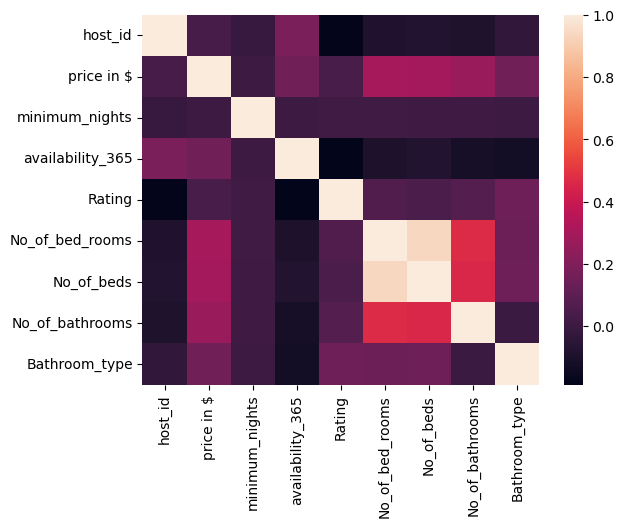

In [913]:
# 2.2.2 Display the correlation matrix as a heatmap
sns.heatmap(correlation_matrix)

### 2.3. **Check if is there any multicollinearity.**

In [915]:
#Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [916]:
# 2.3.1 Select all numerical columns *except* host_id.
df3 = df2.select_dtypes(['float','int']).drop(columns=['host_id'])
df3

,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,69.0,3,7,4.89,1,1,1,0
1,106.0,1,0,4.44,1,1,0,1
2,270.0,4,2,4.86,3,3,1,1
3,200.0,3,0,4.76,1,1,1,1
4,137.0,3,0,4.94,1,1,1,1
...,...,...,...,...,...,...,...,...
7364,406.0,1,286,4.71,1,1,1,1
7365,339.0,1,235,3.67,1,1,1,1
7416,99.0,1,95,4.86,1,1,1,1
7425,106.0,1,19,5.00,1,1,1,0


In [917]:
# 2.3.2 Make sure there are no missing (NaN) values 
df3.isna().sum()

price in $          0
minimum_nights      0
availability_365    0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

In [918]:
# 2.3.3 Add a constant column for the VIF calculation
df3 = sm.add_constant(df3)

In [919]:
# # 2.3.4 Calculate the VIF for each of the columns and display the information.(Make E.C.?)

def vifCalculation(df3): 
    vif_df = pd.DataFrame()               # creating new dataframe for storing VIFs
    vif_df['feature'] = df3.columns       # assigning feature names to 'feature' column

    # Calculating VIF for each feature
    vif_df['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]

    return vif_df

vif_df = vifCalculation(df3)
print(vif_df)

            feature         VIF
0             const  539.263860
1        price in $    1.207937
2    minimum_nights    1.000531
3  availability_365    1.120347
4            Rating    1.060279
5   No_of_bed_rooms    8.724212
6        No_of_beds    8.568648
7   No_of_bathrooms    1.353776
8     Bathroom_type    1.089306


### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

<Axes: xlabel='price in $'>

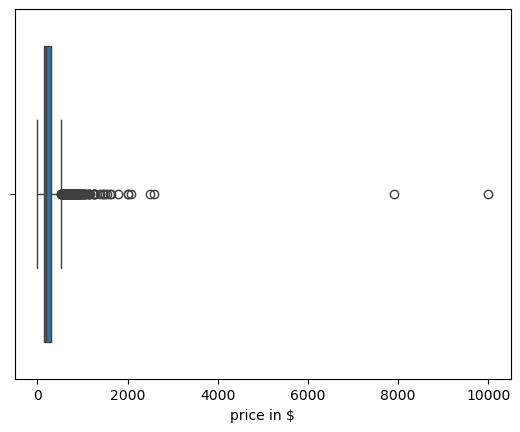

In [921]:
# 2.4.1. Show boxplot of price in $ 
# df3['price in $'].plot.box()
sns.boxplot(x = df3['price in $'])

In [922]:
# 2.4.2 Show the maximum price in $
df3['price in $'].max()

10000.0

<Axes: xlabel='minimum_nights'>

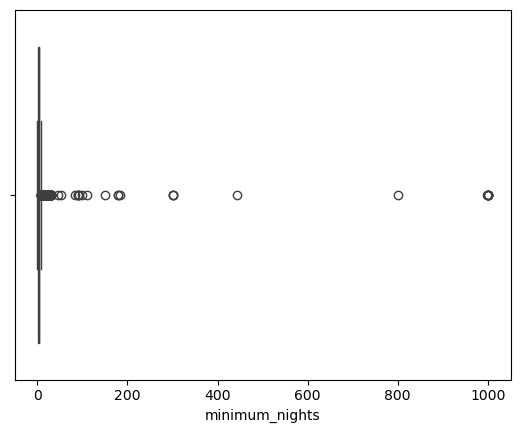

In [923]:
# 2.4.3 Show a boxplot for minimum_nights
sns.boxplot(x = df3['minimum_nights'])

<Axes: xlabel='Rating'>

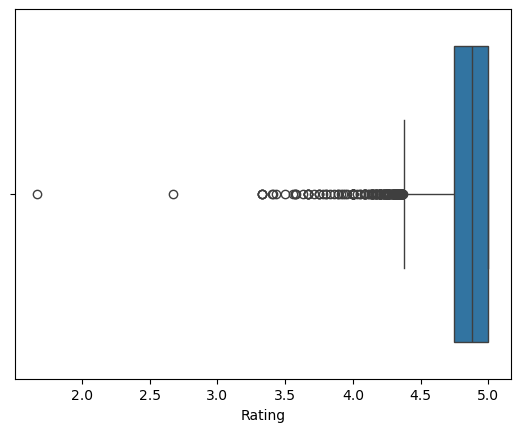

In [924]:
# 2.4.4 Show a boxplot for Rating
# df3['Rating'].plot.box()
sns.boxplot(x=df3['Rating'])

In [925]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.
'''
1. Function is created to drop outlier. 
2. Another function is created to calculate IQR.
3. IQR is extracted from dataframe describe function. Data frame is then sliced to get two rows only and subtraction is performes between rows 
   to get the IQR for all column.
'''

def dropOutliers(df, column, multiplier):
    
    # First get IQR
    def getIQR():
        # get IQR for each columns using describe function
        df_describe = df.describe()[4:7:2]
        df_new = pd.DataFrame()
        df_new = df_describe.loc['75%'] - df_describe.loc['25%']
        iqr = df_new.loc[column]
        df_new
        return iqr
        
    column_iqr = getIQR()
    iqr_mp = multiplier * column_iqr
    # drop rows from data frame where outlier exist based on the provided multiplier of IQR
    df.drop(df[(df[column] < df[column].quantile(q=0.25)-iqr_mp) | (df[column] > df[column].quantile(q=0.75)+iqr_mp )].index, axis= 0, inplace=True)

    
# To drop outlier run the below function
# dropOutliers(df3, 'minimum_nights', 1.5)


In [926]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)
'''
1. getoutlier function is created to get the outlier for provided columns.
2. getIQR function is created to get IQR of provided columns.
3. Apply and lambda function is used for efficient operation for list of columns
4. Function return series object and eventyually combined as a dataframe.
'''
#  function parameter as input may be like df[..columns..].apply(function_to_find_outlier(multiplier))

def getOutliers(column, multiplier):
    # First get IQR
    def getIQR():
        # Find Quartile 1st, 3rd and IQR
        q1 = column.quantile(q=0.25)
        q3 = column.quantile(q=0.75)
        IQR = q3-q1
        return IQR, q1, q3
        
    column_iqr, q1, q3 = getIQR()
    iqr_mp = multiplier * column_iqr
    lower_filterValue = q1 - iqr_mp
    upper_filterValue = q3 + iqr_mp
    
    # rows from data frame where outlier exist based on the provided multiplier of IQR
    col_outlier = column[(column < lower_filterValue ) | (column > upper_filterValue )]
    return col_outlier
    
        
# df_Outlier = getOutliers(df3, 'minimum_nights', 1.5)
colList= ['price in $', 'minimum_nights', 'Rating']
outlierSeries_for_multiplier =  df3[colList].apply(lambda col : getOutliers(col, 1.5))
outlierSeries_for_multiplier

,price in $,minimum_nights,Rating
14,675.0,NaN,NaN
15,NaN,14.0,NaN
24,NaN,9.0,NaN
26,NaN,21.0,NaN
38,1036.0,NaN,NaN
...,...,...,...
7283,NaN,NaN,4.33
7302,NaN,NaN,4.33
7357,539.0,NaN,NaN
7359,550.0,NaN,NaN


In [927]:
# 2.4.7 Display the count of outliers in each selected column
for series in outlierSeries_for_multiplier:
    print(f" Outlier Count for column { series } is {outlierSeries_for_multiplier[series].count()}")

 Outlier Count for column price in $ is 236
 Outlier Count for column minimum_nights is 176
 Outlier Count for column Rating is 247


In [928]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.
outlierSeries_for_multiplier_of_3 =  df3[colList].apply(lambda col : getOutliers(col, 3))
outlierSeries_for_multiplier_of_3

,price in $,minimum_nights,Rating
15,NaN,14.0,NaN
26,NaN,21.0,NaN
38,1036.0,NaN,NaN
43,NaN,30.0,NaN
52,NaN,28.0,NaN
...,...,...,...
6914,NaN,NaN,3.33
7013,2083.0,NaN,NaN
7100,1000.0,NaN,NaN
7247,NaN,30.0,NaN


In [929]:
# 2.4.9 Display the new count of outliers in each selected column
for series in outlierSeries_for_multiplier_of_3:
    print(f" Outlier Count for column { series } is {outlierSeries_for_multiplier_of_3[series].count()}")

 Outlier Count for column price in $ is 73
 Outlier Count for column minimum_nights is 132
 Outlier Count for column Rating is 35


### 2.5. **Compute the Average Price for Each Type of Listing.**

In [931]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type
# Select the earlier data frame containing column room_type i.e df2
result_avgRoomType = df2.groupby(['room_type'])['price in $'].mean().reset_index(name='AveragePrice')
result_avgRoomType

,room_type,AveragePrice
0,Entire home/apt,264.635744
1,Hotel room,211.170213
2,Private room,168.562668
3,Shared room,165.705882


<Axes: xlabel='room_type', ylabel='AveragePrice'>

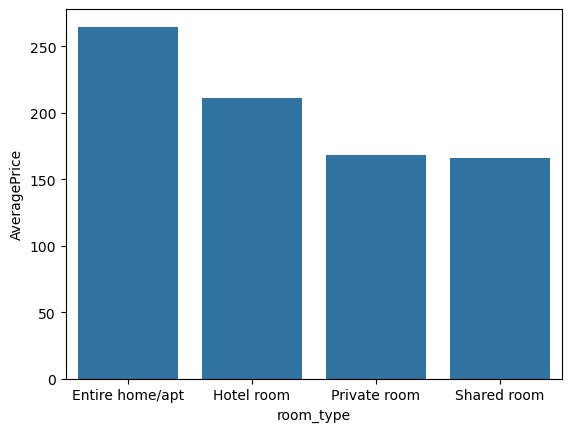

In [932]:
# 2.5.2 Plot and display the average price for each room type
sns.barplot(result_avgRoomType, x="room_type", y="AveragePrice")

### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [934]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'
result_aptType = df2.groupby(['Apartment_type']).size().reset_index(name='Frequecy')
result_aptType.head(5)

,Apartment_type,Frequecy
0,Aparthotel,15
1,Barn,1
2,Bed and breakfast,284
3,Boat,132
4,Boutique hotel,58


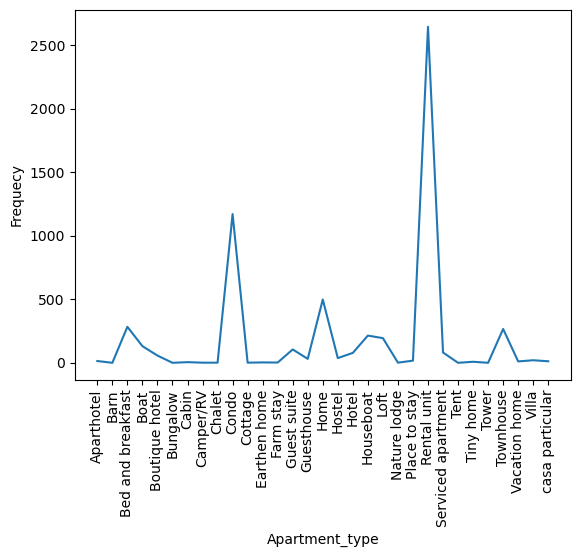

In [935]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'
sns.lineplot(data=result_appType, x="Apartment_type", y="Frequecy")

# X-axis label rotating from better readability
plt.xticks(rotation=90)

plt.show()

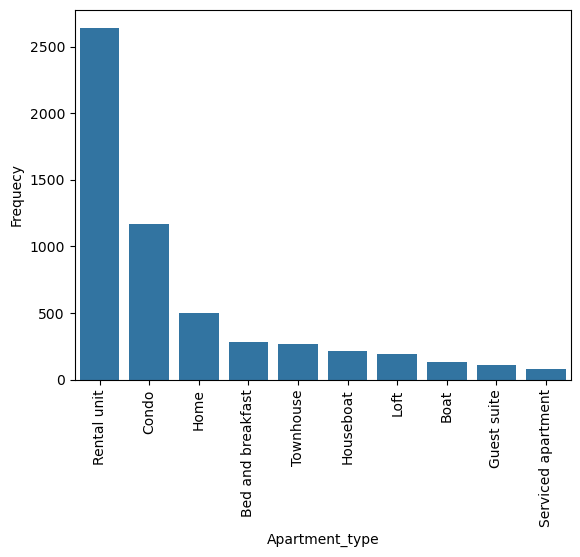

In [936]:
# 2.6.3. Find, Plot, and Display the top 10 most common apartment types
result_commAptType = result_appType.nlargest(10, columns='Frequecy')

sns.barplot(data=result_commAptType, x="Apartment_type", y="Frequecy")

# X-axis label rotating from better readability
plt.xticks(rotation=90)

plt.show()

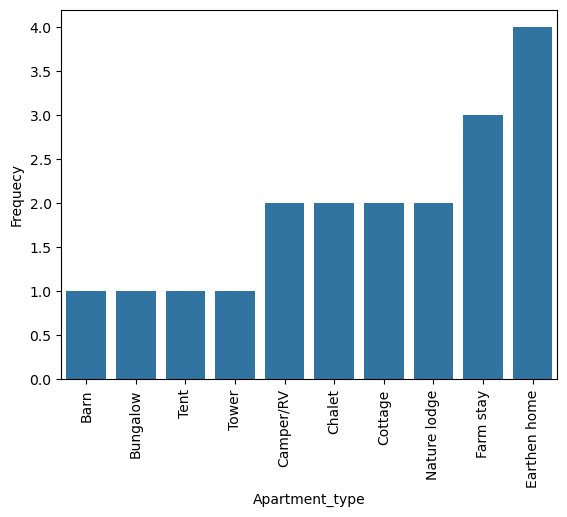

In [937]:
# 2.6.4 Find, Plot, and Display the bottom 5 least common apartment types
result_leastCommAptType = result_appType.nsmallest(10, columns='Frequecy')

sns.barplot(data=result_leastCommAptType, x="Apartment_type", y="Frequecy")

# X-axis label rotating from better readability
plt.xticks(rotation=90)

plt.show()

### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [939]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price

result_avgExpensiveneighbourhood = df2.groupby('neighbourhood')['price in $'].mean().reset_index(name = 'AvgPrice').nlargest(5, columns = 'AvgPrice')

result_avgExpensiveneighbourhood

,neighbourhood,AvgPrice
5,Centrum-West,294.313292
4,Centrum-Oost,282.940240
21,Zuid,260.352632
8,De Pijp - Rivierenbuurt,256.616790
7,De Baarsjes - Oud-West,238.291895


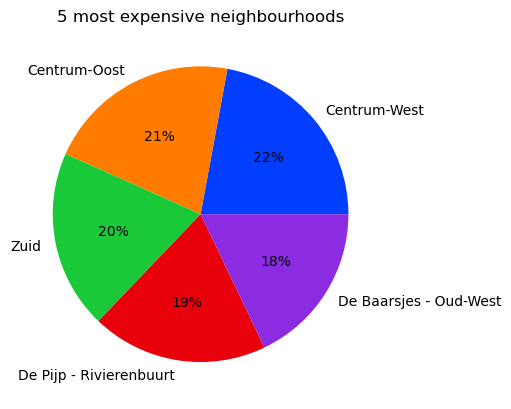

In [940]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods

# sns.barplot(data=result_avgExpensiveneighbourhood, x="neighbourhood", y="AvgPrice")

# # X-axis label rotating from better readability
# plt.xticks(rotation=90)

# plt.show()

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(result_avgExpensiveneighbourhood['AvgPrice'], labels=result_avgExpensiveneighbourhood['neighbourhood'], colors=palette_color, autopct='%.0f%%')

# title of piechart
plt.title('5 most expensive neighbourhoods')

plt.show()